In [24]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


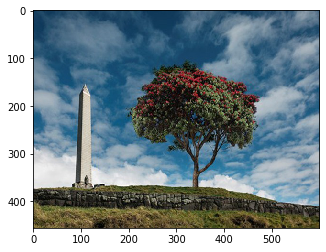

In [25]:
# let start from an image named "tree"
image = sc2.utils.image_load("tree")
# have a look at the original image
sc2.utils.image_show(image)

In [26]:
# backup the original image first
backup = np.copy(image)

In [27]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.2)

100%|██████████| 180/180 [00:06<00:00, 26.11it/s]


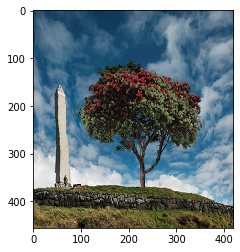

In [31]:
image = np.copy(backup)
# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

100%|██████████| 180/180 [00:07<00:00, 25.42it/s]


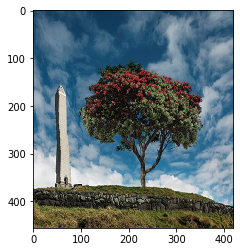

In [33]:
image = np.copy(backup)
# remove seams with diffusion
energy = sc2.energy.laplacian(image)
diffusion = np.zeros_like(energy)
for i in tqdm.tqdm(range(steps)):
    seam = sc2.seamops.detect_seam(energy + diffusion)
    image = sc2.seamops.remove_seam(image, seam)
    diffusion = sc2.energy.diffusion(energy, seam, p=0.5)
    diffusion = sc2.seamops.remove_seam(diffusion, seam)
    energy = sc2.energy.laplacian(image)
# have a look
sc2.utils.image_show(image)

In [ ]:
# TODO: find a better example